In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy import exp
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
cwd = os.getcwd()
dataPath = os.path.join(cwd, "../data/winequality-red.csv")

In [3]:
df = pd.read_csv(dataPath)

In [4]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
## veri tiplerine bakalım ve eksik veri olup olmadığını kontrol edelim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [7]:
## sütunların temel istatistiksel değerleri
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

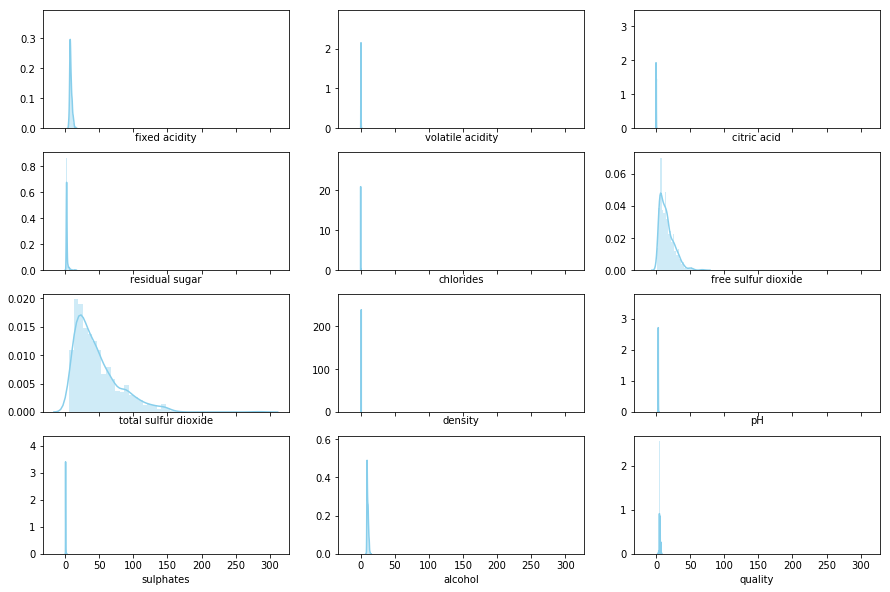

In [19]:
f, axes = plt.subplots(4, 3, figsize=(15, 10), sharex=True)
for i, cname in enumerate(df.columns.tolist()):
    sns.distplot(df[cname], color="skyblue", ax=axes[int(i/3), int(i%3)])

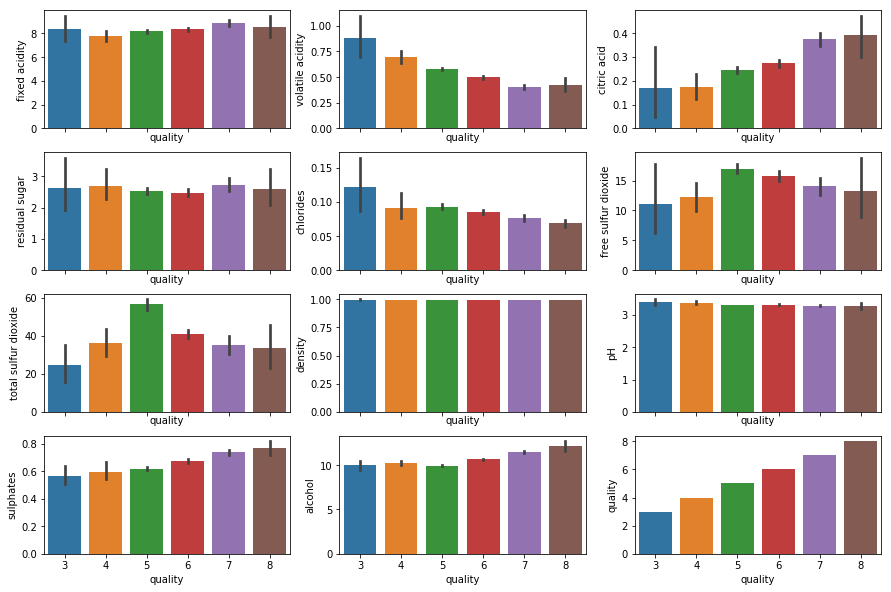

In [32]:
## bütün sütunların kaliteyl eolan ilişkisinin bar grafiğinde gösterimi
def plot_relations(df):
    f, axes = plt.subplots(4, 3, figsize=(15, 10), sharex=True)
    for i, cname in enumerate(df.columns.tolist()):
        sns.barplot(x = 'quality', y = cname, data = df, ax=axes[int(i/3), int(i%3)])
        
plot_relations(df)

In [90]:
## scale features to observe relationships with quality
df_scaled = MinMaxScaler(feature_range=(0,1)).fit_transform(df.drop("quality", axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.drop("quality", axis=1).columns)
df_scaled = pd.concat([df_scaled, df.loc[:, "quality"]], axis=1)
df_scaled.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        0.329171          0.279329     0.270976        0.112247   
std         0.154079          0.122644     0.194801        0.096570   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.221239          0.184932     0.090000        0.068493   
50%         0.292035          0.273973     0.260000        0.089041   
75%         0.407080          0.356164     0.420000        0.116438   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.125988             0.209506              0.142996     0.490211   
std       0.078573             0.147326              0.116238     0.138571   
min       0.000000             0.000000              0.000000     0.000000   
25%       0.096828             0.084507              0.056537     0.406021   
50%       0.111853             0.183099              0.113074     0.490455   
75%       0.130217             0.281690              0.197880     0.570117   
max       1.000000             1.000000              1.000000     1.000000   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      0.449695     0.196496     0.311228     5.636023  
std       0.121564     0.101501     0.163949     0.807569  
min       0.000000     0.000000     0.000000     3.000000  
25%       0.370079     0.131737     0.169231     5.000000  
50%       0.448819     0.173653     0.276923     6.000000  
75%       0.519685     0.239521     0.415385     6.000000  
max       1.000000     1.000000     1.000000     8.000000

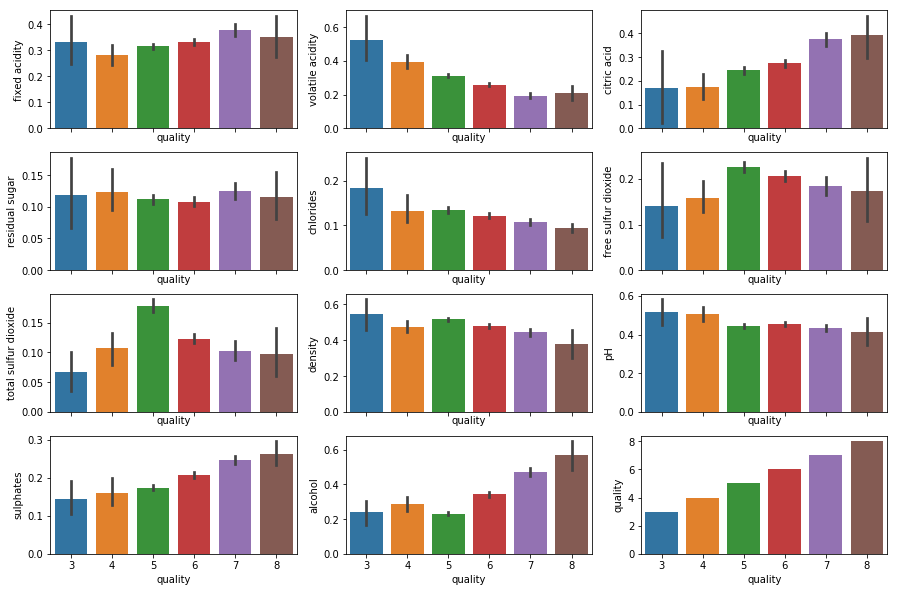

In [91]:
plot_relations(df_scaled)

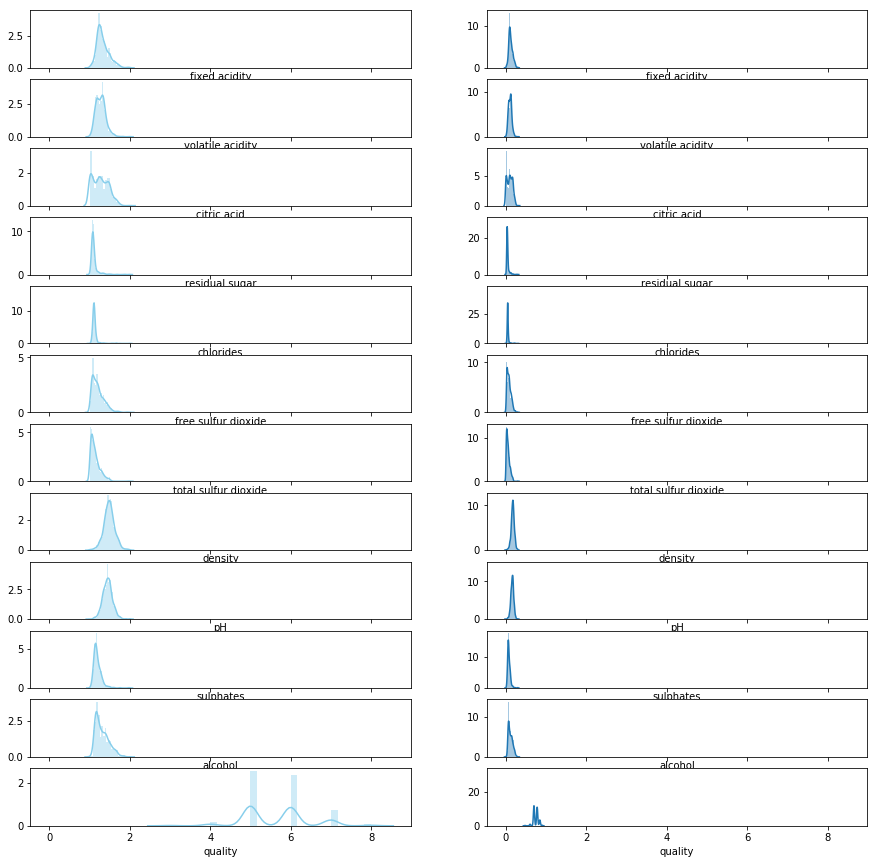

In [71]:
f, axes = plt.subplots(12, 2, figsize=(15, 15), sharex=True)
for i, cname in enumerate(df.columns.tolist()):
    sns.distplot(df_scaled[cname], color="skyblue", ax=axes[i, 0])
    sns.distplot(df_scaled[cname].apply(lambda x: np.log10(x)), ax=axes[i, 1])

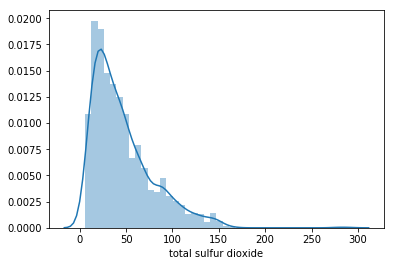

In [85]:
sns.distplot(df.loc[:, "total sulfur dioxide"])

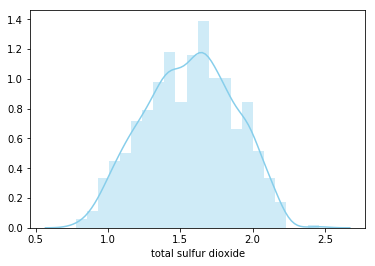

In [58]:
sns.distplot(df.loc[:, "total sulfur dioxide"].apply(lambda x: np.log10(x)), color="skyblue")

In [75]:
## train test split
X = df_scaled.drop("quality", axis=1)
y = df_scaled["quality"]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [77]:
## Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

C:\Users\yahya.civelek\.virtualenvs\wine-quality-G_jK-4G3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [78]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.63      0.84      0.72       127
           6       0.53      0.60      0.56       131
           7       0.00      0.00      0.00        47
           8       0.00      0.00      0.00         4

   micro avg       0.58      0.58      0.58       320
   macro avg       0.19      0.24      0.21       320
weighted avg       0.47      0.58      0.52       320



C:\Users\yahya.civelek\.virtualenvs\wine-quality-G_jK-4G3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [81]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [82]:
grid_svc.fit(X_train, y_train)

C:\Users\yahya.civelek\.virtualenvs\wine-quality-G_jK-4G3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\yahya.civelek\.virtualenvs\wine-quality-G_jK-4G3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [83]:
grid_svc.best_params_

{'C': 1.4, 'gamma': 1.4, 'kernel': 'rbf'}

In [84]:
svc2 = SVC(C = 1.4, gamma =  1.4, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.66      0.76      0.71       127
           6       0.54      0.70      0.61       131
           7       1.00      0.04      0.08        47
           8       0.00      0.00      0.00         4

   micro avg       0.60      0.60      0.60       320
   macro avg       0.37      0.25      0.23       320
weighted avg       0.63      0.60      0.54       320



C:\Users\yahya.civelek\.virtualenvs\wine-quality-G_jK-4G3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
